# **Housing Prices**


### Importing Libraries:

In [315]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset:

**Dataset:** https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/

In [318]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data Preprocessing:

In [321]:
df = df.replace({"yes":1, "no":0, "furnished":1, "semi-furnished":2, "unfurnished":0})
df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6740\655900828.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"yes":1, "no":0, "furnished":1, "semi-furnished":2, "unfurnished":0})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [323]:
features = df.loc[:, df.columns != "price"]
features

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,1
1,8960,4,4,4,1,0,0,0,1,3,0,1
2,9960,3,2,2,1,0,1,0,0,2,1,2
3,7500,4,2,2,1,0,1,0,1,3,1,1
4,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,2
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,1


In [325]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.51769249,
         1.80494113, -0.10486857],
       [ 1.75700953,  1.40341936,  5.40580863, ...,  2.67940935,
        -0.55403469, -0.10486857],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.51769249,
         1.80494113,  1.06152674],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.80574124,
        -0.55403469, -1.27126387],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.80574124,
        -0.55403469, -0.10486857],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.80574124,
        -0.55403469, -1.27126387]])

In [327]:
targets = df["price"]
targets = targets.values.reshape(-1, 1)
targets[0:5]

array([[13300000],
       [12250000],
       [12250000],
       [12215000],
       [11410000]], dtype=int64)

In [329]:
target_scaler = StandardScaler()
targets_scaled = target_scaler.fit_transform(targets)
targets_scaled[0:5]

array([[4.56636513],
       [4.00448405],
       [4.00448405],
       [3.98575468],
       [3.55497918]])

In [331]:
print(f"Features have shape: {features.shape}")
print(f"Targets have shape: {targets.shape}")

Features have shape: (545, 12)
Targets have shape: (545, 1)


### Defining and Training Model 

In [334]:
def define_and_compile_model():
    
    model = tf.keras.Sequential([ 
		# Define the Input with the appropriate shape
		tf.keras.Input(shape=(12,)),
        
        tf.keras.layers.Dense(units=512, activation='relu'),
        tf.keras.layers.Dense(units=256, activation='relu'),  
        tf.keras.layers.Dense(units=128, activation='relu'),  
        tf.keras.layers.Dense(units=64, activation='relu'),  

		tf.keras.layers.Dense(units=1)
	]) 
    
    
    model.compile(optimizer='sgd', loss='mse')

    return model

In [336]:
untrained_model = define_and_compile_model()

untrained_model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 512)                 │           6,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179,201 (700.00 KB)

 Trainable params: 179,201 (700.00 KB)

 Non-trainable params: 0 (0.00 B)

In [338]:
def train_model():
    
    model = define_and_compile_model()
    model.fit(features_scaled, targets_scaled, epochs=500)
    
    return model

In [340]:
trained_model = train_model()

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8699
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6314 
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4195 
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3520 
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3346 
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3461 
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2838 
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3029 
Epoch 9/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2881 
Epoch 10/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2495 
Epoch 11/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2459 
Epoch 12/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2863
Epoch 13/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2700 
Epoch 14/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2214
Epoch 15/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 

### Predicting Price:

In [342]:
predicted_price = trained_model.predict(features_scaled, verbose=False)
predicted_price = target_scaler.inverse_transform(predicted_price)
predicted_price[0:5]

array([[12086121.],
       [12546550.],
       [12477752.],
       [12298392.],
       [11475070.]], dtype=float32)

In [343]:
# Merging Actual Price and Predicted price data
predicted_df = pd.DataFrame(predicted_price)
predicted_df.columns = ["predicted price"]
merged_df = pd.merge(predicted_df, df, left_index=True, right_index=True)
merged_df

,predicted price,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,12086121.00,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12546550.00,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12477752.00,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12298392.00,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11475070.00,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1909486.25,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,2000968.25,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,2698928.00,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,2559747.25,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


### Regression Plot between Actual Price and Predicted Price

<Axes: xlabel='price', ylabel='predicted price'>

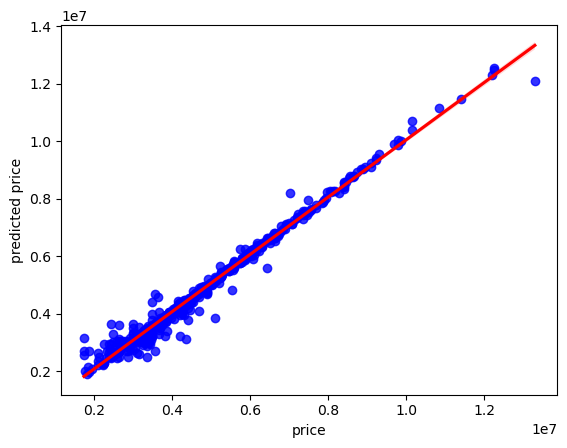

In [345]:
sns.regplot(x='price', y='predicted price', data=merged_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})